# Project #1 Detecting Patterns in Tabular Medical Data with MIMIC-III
You can read more about the dataset here: https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction

Excerise questions given by Dr. Barak Or.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
my_path="/content/drive/MyDrive/Project 1 MIMIC/"

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


# Load the data
data = pd.read_csv(my_path+"MIMIC_data.csv")

In [ ]:
data

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [ ]:
print(data.head())

   group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.1625

In [ ]:
data.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,...,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,...,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,...,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,2.000000,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


# Q1.a
What are the mean, median, mode, and standard deviation of the age, BMI, and Blood sodium columns in the dataset? Why are these statistics important for understanding the data?

In [ ]:
#This func. calculates and prints the mean, median, mode and std of a given column from the df data.
def print_stats(column):
  print(str(column), "mean:", data[column].mean())
  print(str(column), "median:", data[column].median())
  print(str(column), "mode:", data[column].mode())
  print(str(column), "std:", data[column].std())
  print()
print_stats('age')
print_stats('BMI')
print_stats('Blood sodium')


age mean: 74.05522514868309
age median: 77.0
age mode: 0    89
Name: age, dtype: int64
age std: 13.434060756372126

BMI mean: 30.188277651590436
BMI median: 28.3124741
BMI mode: 0    23.296976
1    23.724537
Name: BMI, dtype: float64
BMI std: 9.325997440128406

Blood sodium mean: 138.89001647986404
Blood sodium median: 139.25
Blood sodium mode: 0    140.0
Name: Blood sodium, dtype: float64
Blood sodium std: 4.151346613012863





#Answer:
As the data set deals with predictors of in-hospital mortality for intensive care units (ICU)-admitted HF patients,
these parameters are important to learn about the population distribution.
This is why one could use data.describe() to learn about the distribution of all the parameters.

# Q1.b
How do the distributions of age, BMI, and Blood sodium look in the dataset? What can we learn from these distributions about the patient population?

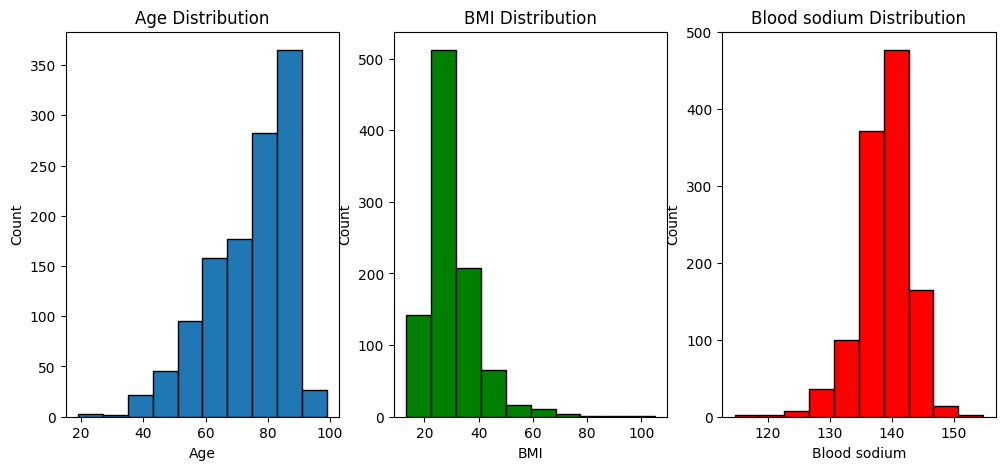

In [ ]:
# Visualize these parameters in the population
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
data.age.plot(kind='hist', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
data.BMI.plot(kind='hist', edgecolor='black', color='green')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
data['Blood sodium'].plot(kind='hist', edgecolor='black', color='red')
plt.title('Blood sodium Distribution')
plt.xlabel('Blood sodium')
plt.ylabel('Count')

plt.show()

## Age
We can see that most patients are old (median=77) with a left-tail histogram.
## BMI
The histogram for the BMI of patient population has a right tail. The median (~ 28) and mean (~ 30) suggests that most patients are slighly obese, as normal range definition is between 18.5-25.
## Blood sodium
The patient population is more evenly distributed and within the normal ranage of 135-145 milliequivalents per liter (mEq/L).


# Q 1.c
Use pandas and scikit-learn to drop rows with missing values in the 'BMI' and 'Blood sodium' columns, and then uses logistic regression, SVM, kNN, and decision tree to predict an 'outcome' based on the features 'age', 'BMI', and 'Blood sodium'. Ensure to split the data using train_test_split with a 20% test size and a random state of 42. Finally, fit the model, make predictions on the test set, and print a report of the best model (“classification_report”). Explain the result of the confusion matrix for the best model.

In [ ]:
# data imputation; remove rows with na values
imputed_data = data.dropna(subset = ['BMI', 'Blood sodium'])

# define features (X) and label (y) columns from the data df
X = imputed_data[['age', 'BMI', 'Blood sodium']]
y = imputed_data["outcome"]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# This function recieves y_test, y_pred,and model_name (str) and plots the confusion matrix as an esthetic seaborn figure
def Plot_confusion_matrix(y_test, y_pred,model_name):
  plt.figure(figsize=(3, 3))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(model_name+' Confusion Matrix')
  plt.show()

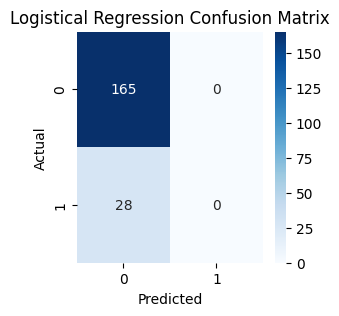

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       165
         1.0       0.00      0.00      0.00        28

    accuracy                           0.85       193
   macro avg       0.43      0.50      0.46       193
weighted avg       0.73      0.85      0.79       193



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Train a Logistical regression model

logreg = LogisticRegression() # Create a logistic regression model
logreg.fit(X_train, y_train) #Fit the model
y_pred = logreg.predict(X_test) # Predict y values
#print("confusion_matrix: \n", confusion_matrix(y_test, y_pred)) # Print the confusion matrix

# Plot confusion matrix
Plot_confusion_matrix(y_test, y_pred,'Logistical Regression')

#print("logistic regression score: ",logreg.score(X_test, y_test)) # Use score method to get accuracy of model
print(classification_report(y_test, y_pred)) # Print a classification report

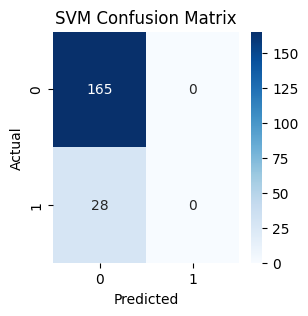

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       165
         1.0       0.00      0.00      0.00        28

    accuracy                           0.85       193
   macro avg       0.43      0.50      0.46       193
weighted avg       0.73      0.85      0.79       193



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Train a SVM model

from sklearn import svm

svmClassifier = svm.SVC(kernel='linear') # Create SVM model
svmClassifier.fit(X_train, y_train) # Train the model
#accuracy = svmClassifier.score(X_test, y_test) # Test the model
y_pred = svmClassifier.predict(X_test) # Predict
#print("confusion_matrix: \n", confusion_matrix(y_test, y_pred)) # Print the confusion matrix

# Plot confusion matrix
Plot_confusion_matrix(y_test, y_pred,'SVM')

#print("Accuracy of SVM:", svmClassifier.score(X_test, y_test)) # Evaluate the predictions
print(classification_report(y_test, y_pred)) # Print a classification report

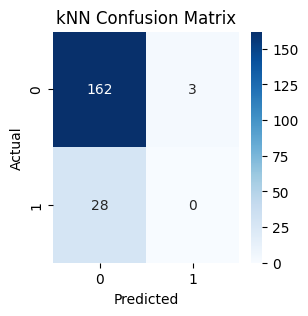

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       165
         1.0       0.00      0.00      0.00        28

    accuracy                           0.84       193
   macro avg       0.43      0.49      0.46       193
weighted avg       0.73      0.84      0.78       193



In [ ]:
# Train a kNN model

knnclassifier = KNeighborsClassifier() # Create kNN model
knnclassifier.fit(X_train, y_train) # Train the model
y_pred = knnclassifier.predict(X_test) # Predict
#print("Accuracy of kNN:", knnclassifier.score(X_test, y_test)) # Test the model
#print("confusion_matrix: \n", confusion_matrix(y_test, y_pred)) # Print the confusion matrix

# Plot confusion matrix
Plot_confusion_matrix(y_test, y_pred,'kNN')

print(classification_report(y_test, y_pred)) # Print a classification report

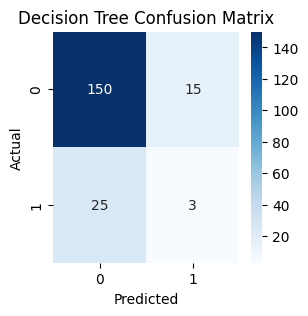

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       165
         1.0       0.17      0.11      0.13        28

    accuracy                           0.79       193
   macro avg       0.51      0.51      0.51       193
weighted avg       0.76      0.79      0.77       193



'\n# Visualize the decision tree\nplt.figure(figsize=(20,10))\ntree.plot_tree(tree_clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)\nplt.title("Decision Tree Visualization")\nplt.show()\n'

In [ ]:
# Train a decision tree model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#print(f'Decision Tree Accuracy: {accuracy:.2f}')
#print("confusion_matrix: \n", confusion_matrix(y_test, y_pred)) # Print the confusion matrix

# Plot confusion matrix
Plot_confusion_matrix(y_test, y_pred,'Decision Tree')


print(classification_report(y_test, y_pred)) # Print a classification report
'''
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(tree_clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree Visualization")
plt.show()
'''


## The Logistical regression, SVM and kNN models show 0 for the TN square, so despite haveing accuracy of 0.84-0.85, they fail to capture predition for patients that died.
## This bias could originate from the fact that most of the data has outcome 0 and not 1, which skewes the model. This might be a good outcome for the patiants (the get to live) but this is not good for training these models.

## Based on these resuls, I would choose the descision tree since it is capturing true results for most of the TP and some of the TN.

## The precision metric is therefore highest in the descision tree (0.86) for predicting outcome = 0 (patient lived), and also is the only one which is not zero for prediction outcome = 1 (patiend died).

## Moreover, this model has other advantages; it can be calculated very fast, easy to interpert and it uses crucial features so it is easy to understand in the context of medical-healthcare.


Explain the result of the confusion matrix for the best model where you mention for each cell its meaning.

A confusion matrix is a table visualizing the performance of a classification model. It compares the model's **predictions** to the **actual** labels and helps evaluate the models and choose the best one, considering error costs.

True Positive (TP): Correctly predicted positive cases.
True Negative (TN): Correctly predicted negative cases.
False Positive (FP): Incorrectly predicted positive cases (Type I error).
False Negative (FN): Missed positive cases (Type II error).

* True Positive (TP): Correctly predicted positive cases.
* True Negative (TN): Correctly predicted negative cases.
* False Positive (FP): Incorrectly predicted positive cases (Type I error).
* False Negative (FN): Missed positive cases (Type II error).

In this case, the descision tree matrix is:
* TP=3
* TN=150
* FP=25
* FN=15

and is the only model where the value of TP is not zero, while keeping the TN value in an acceptable high level.

# Q1.d
Predict BMI based on age and Blood sodium with linear regression, SVM regressor, Decision tree regressor, and kNN regressor. Calculate RMSE, MSE, R-squared.
Split where 20% left for the test, random state=42.
Plot the actual vs. the predicted value for each model’s test dataset.

Linear Regression
RMSE: 7.98
MSE: 63.69
R^2 Score: -0.02


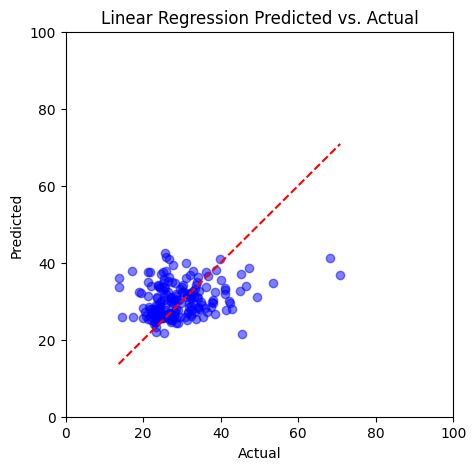


SVM
RMSE: 7.66
MSE: 58.65
R^2 Score: 0.06


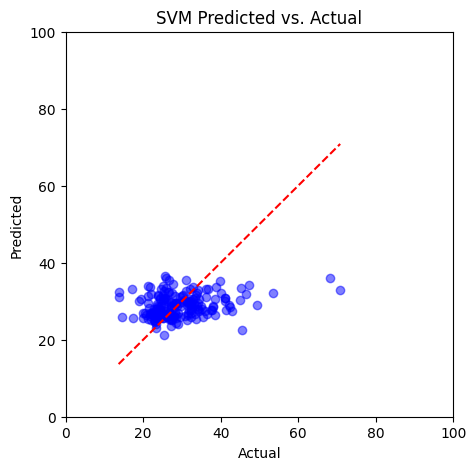


kNN
RMSE: 7.90
MSE: 62.33
R^2 Score: -0.00


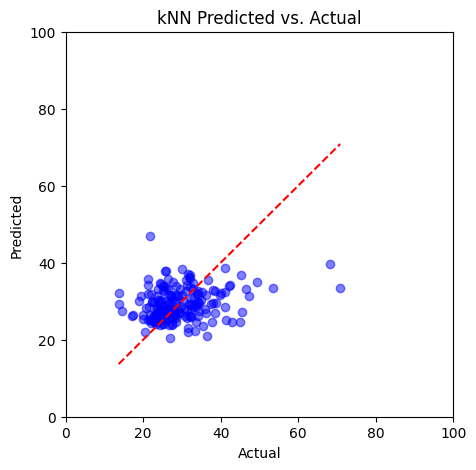


Descision Tree
RMSE: 10.32
MSE: 106.43
R^2 Score: -0.71


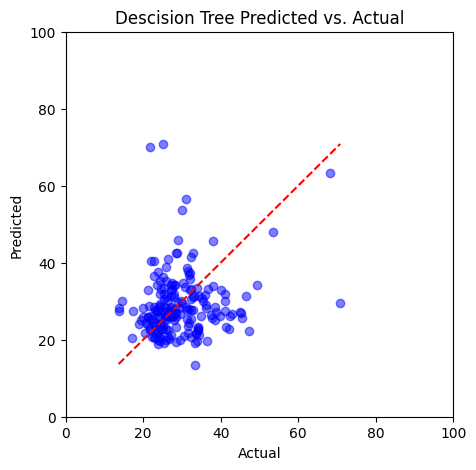

In [ ]:
# define features (X) and label (y) columns from the data df
X = imputed_data[['age', 'Blood sodium']]  # Only features for prediction
y = imputed_data["BMI"]  # Target variable (BMI)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Evaluate the models

def Evaluate_Model(y_test, y_pred,model_name,to_print=True, to_plot=True):
  mse = mean_squared_error(y_test, y_pred)
  rmse = mse ** 0.5
  r2 = r2_score(y_test, y_pred)

  # print the metrics
  if to_print:
    print(model_name)
    print(f"RMSE: {rmse:2.2f}")
    print(f"MSE: {mse:2.2f}")
    print(f"R^2 Score: {r2:2.2f}")

  # Plot the actual vs. the predicted value
  if to_plot:
    plt.figure(figsize=(5, 5))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') #plot a dashed red line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.title(model_name+' Predicted vs. Actual')
    plt.show()
  print()


# linear regression
linearReg = LinearRegression() # Create a linear regression model
linearReg.fit(X_train, y_train) #Fit the model

y_pred = linearReg.predict(X_test) # Predict y values linear regression
Evaluate_Model(y_test, y_pred, 'Linear Regression')

# SVM
svmClassifier = svm.SVR(kernel='linear') # Create svm.SVR model for continous target variable
svmClassifier.fit(X_train, y_train) # Train the model
#accuracy = svmClassifier.score(X_test, y_test) # Test the model
y_pred = svmClassifier.predict(X_test) # Predict
Evaluate_Model(y_test, y_pred, 'SVM')

# kNN
knnclassifier = KNeighborsRegressor() # Create kNN model regressor for continous target variable
knnclassifier.fit(X_train, y_train) # Train the model
y_pred = knnclassifier.predict(X_test) # Predict kNN
Evaluate_Model(y_test, y_pred, 'kNN')

# Descision Tree
tree_clf = DecisionTreeRegressor(random_state=42) # Create descision tree model regressor for continous target variable
tree_clf.fit(X_train, y_train) # Train the model
y_pred = tree_clf.predict(X_test) #Predict descision tree
Evaluate_Model(y_test, y_pred, 'Descision Tree')


These metrics affirm the selection of the descion tree as the best model from these 4 models. the R^2 score is higher and closer to (-)1, albeit with a bit higher RMSE score compared to other models.

# Q2.a

Demonstrate the application of Principal Component Analysis (PCA) and t-Distributed
Stochastic Neighbor Embedding (t-SNE) for dimensionality reduction on the dataset

focusing on BMI, Blood sodium, and Blood calcium to visualize the data in a reduced-
dimensional space. Compare the visualization results of PCA and t-SNE.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

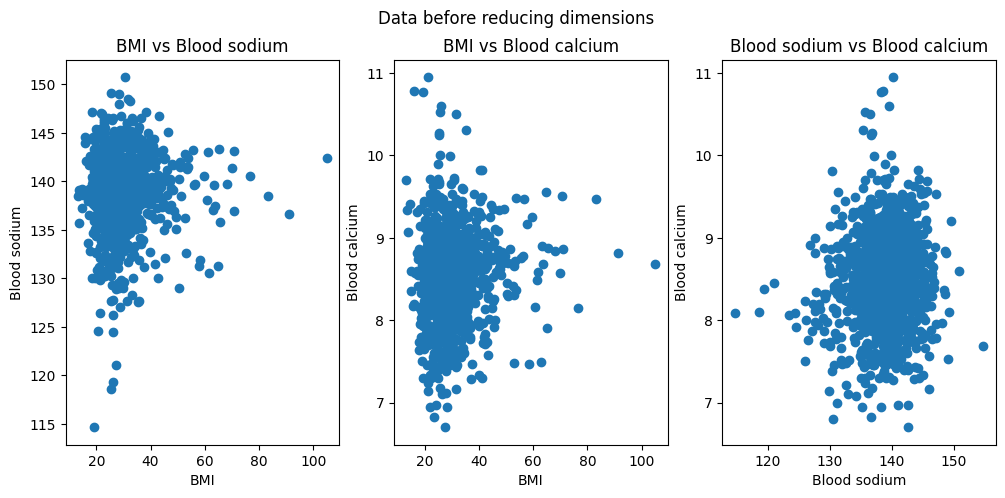

In [ ]:
# Before reducing dimentions:
# plot data for each of the two pairs of features

plt.figure(figsize=(12, 5))
plt.suptitle('Data before reducing dimensions')

plt.subplot(1, 3, 1)
plt.scatter(data['BMI'], data['Blood sodium'])
plt.xlabel('BMI')
plt.ylabel('Blood sodium')
plt.title('BMI vs Blood sodium')

plt.subplot(1, 3, 2)
plt.scatter(data['BMI'], data['Blood calcium'])
plt.xlabel('BMI')
plt.ylabel('Blood calcium')
plt.title('BMI vs Blood calcium')

plt.subplot(1, 3, 3)
plt.scatter(data['Blood sodium'], data['Blood calcium'])
plt.xlabel('Blood sodium')
plt.ylabel('Blood calcium')
plt.title('Blood sodium vs Blood calcium')

plt.show()

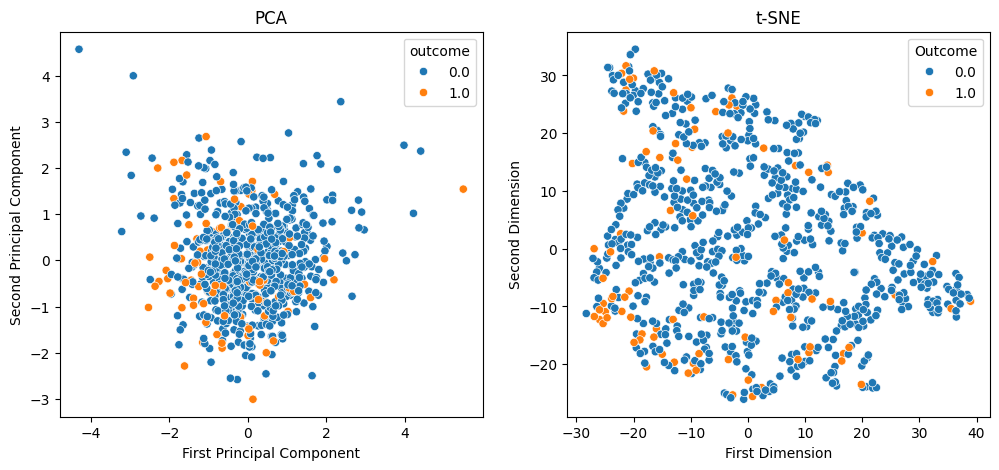

In [ ]:
## Dimensionality reduction and clusterring of the data

# data imputation; remove rows with na values
imputed_data = data.dropna(subset = ['BMI', 'Blood sodium', 'Blood calcium'])

# define features (X) and label (y) columns from the data df
X = imputed_data[['BMI', 'Blood sodium', 'Blood calcium']]
y = imputed_data["outcome"]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


## Principal Component Analysis (PCA)
# Apply PCA
pca = PCA(n_components=2)  #reduce to 2 dimentions
X_pca = pca.fit_transform(X_scaled)
components = pca.components_

# Plot PCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train) #color (hue) by the outcome
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA')


## t-Distributed Stochastic Neighbor Embedding (t-SNE)
# Apply t-SNE
model = TSNE(n_components = 2, random_state = 0) #reduce to 2 dimentions
tsne_data = model.fit_transform(X_scaled)
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("First Dimension", "Second Dimension", "Outcome"))

# Plotting t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(data=tsne_df, x='First Dimension', y='Second Dimension',
               hue='Outcome')  #color (hue) by the outcome
plt.title('t-SNE')

plt.show()

* PCA: Identifies patterns related to overall (magnitude) variance in the data. It's better at capturing linear relationships.
* t-SNE: Focuses on preserving local similarities between data points. It's better at revealing non-linear structures.

In [ ]:
#This code shows PCA and t-SNE plot for 3 dimentions, but as the data we want to evaluate has 3 dimentions I will use 2 dimentions for the visualization.
'''## Dimensionality reduction and clusterring of the data

# data imputation; remove rows with na values
imputed_data = data.dropna(subset = ['BMI', 'Blood sodium', 'Blood calcium'])

# define features (X) and label (y) columns from the data df
X = imputed_data[['BMI', 'Blood sodium', 'Blood calcium']]
y = imputed_data["outcome"]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


## Principal Component Analysis (PCA)
# Apply PCA
pca = PCA(n_components=3) # using n=3
X_pca = pca.fit_transform(X_scaled)
components = pca.components_

## t-Distributed Stochastic Neighbor Embedding (t-SNE)
# Apply t-SNE
model = TSNE(n_components = 3, random_state = 0) # using n=3
tsne_data = model.fit_transform(X_scaled)
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("First Dimension", "Second Dimension", "Third Dimension", "Outcome"))

##########
# Plotting
fig = plt.figure(figsize=(12, 5))

# Plot PCA
ax1 = fig.add_subplot(1, 2, 1, projection='3d') # create a 3D subplot
ax1.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=colors)
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_zlabel('Third Principal Component')
ax1.set_title('PCA')

# Plot t-SNE
ax2 = fig.add_subplot(1, 2, 2, projection='3d') # create a 3D subplot
ax2.scatter(tsne_df["First Dimension"], tsne_df["Second Dimension"], tsne_df["Third Dimension"], c=colors)
ax2.set_xlabel('First Dimension')
ax2.set_ylabel('Second Dimension')
ax2.set_zlabel('Third Dimension')
ax2.set_title('t-SNE')

plt.tight_layout()
plt.show()'''

'## Dimensionality reduction and clusterring of the data\n\n# data imputation; remove rows with na values\nimputed_data = data.dropna(subset = [\'BMI\', \'Blood sodium\', \'Blood calcium\'])\n\n# define features (X) and label (y) columns from the data df\nX = imputed_data[[\'BMI\', \'Blood sodium\', \'Blood calcium\']]\ny = imputed_data["outcome"]\n\n# split the data into train and test sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n\n# Standardize the features\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X_train)\n\n\n## Principal Component Analysis (PCA)\n# Apply PCA\npca = PCA(n_components=3) # using n=3\nX_pca = pca.fit_transform(X_scaled)\ncomponents = pca.components_\n\n## t-Distributed Stochastic Neighbor Embedding (t-SNE)\n# Apply t-SNE\nmodel = TSNE(n_components = 3, random_state = 0) # using n=3\ntsne_data = model.fit_transform(X_scaled)\ntsne_data = np.vstack((tsne_data.T, y_train)).T\ntsne_df = pd.DataFrame(

# Q2.b
Apply K-means clustering to the dataset to group patients based on age, BMI, diabetes, and heart rate. Cluster to 2,3,4,5, and 6 groups. What are Silhouette and Davies-Bouldin Score for each case?

In [ ]:
# K-Means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform

# data imputation; remove rows with na values
imputed_data = data.dropna(subset = ['age', 'BMI', 'diabetes', 'heart rate'])

# define features (X) and label (y) columns from the data df
X = imputed_data[['age', 'BMI', 'diabetes', 'heart rate']]
y = imputed_data["outcome"]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

### n_clusters = 2 ###
Silhouette Score: 0.31238983486519517
Davies-Bouldin Score: 1.4790501899903936
Dunn Index: 0.14916314840654168


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


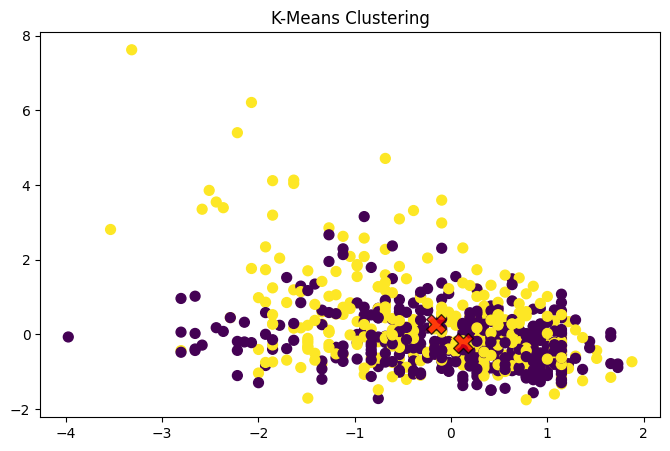

### n_clusters = 3 ###
Silhouette Score: 0.317420344846888
Davies-Bouldin Score: 1.2700358508288263
Dunn Index: 0.017939303799031577


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


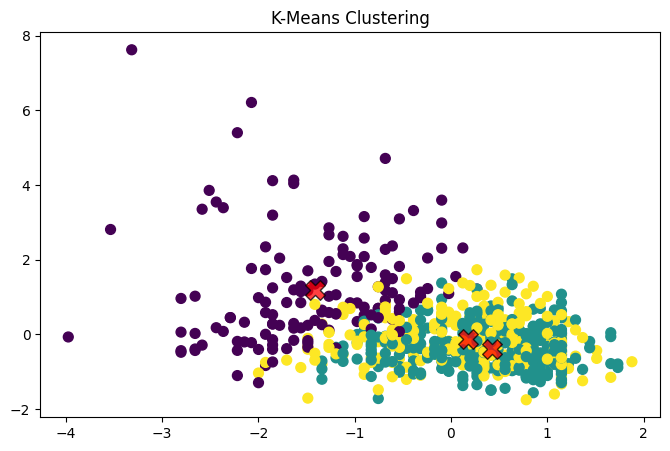

### n_clusters = 4 ###
Silhouette Score: 0.316656230392771
Davies-Bouldin Score: 1.1489800729066415
Dunn Index: 0.020996138795278296


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


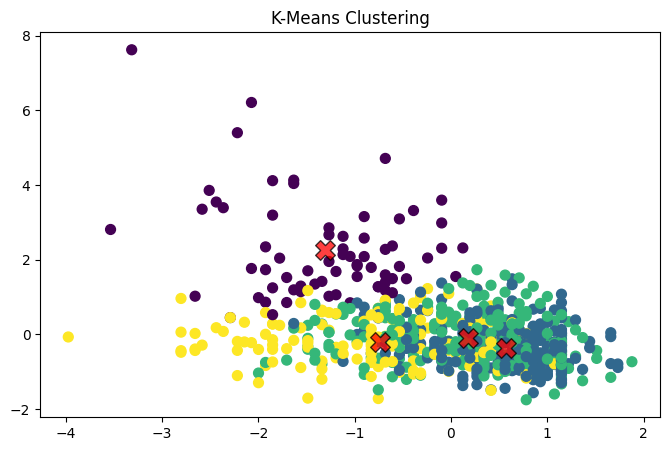

### n_clusters = 5 ###
Silhouette Score: 0.30377138335859355
Davies-Bouldin Score: 1.193717456061266
Dunn Index: 0.013404237891612273


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


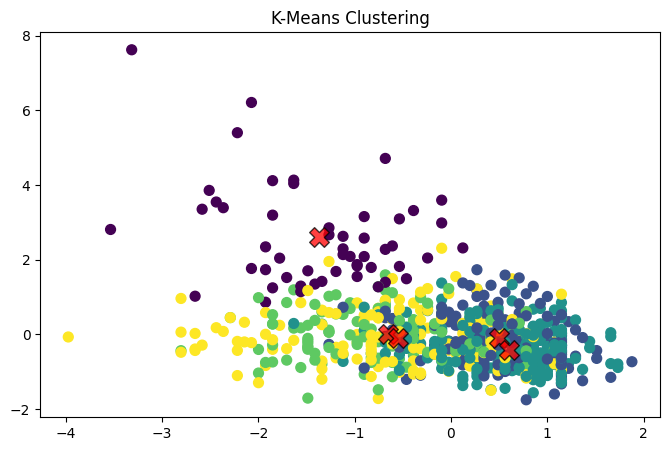

### n_clusters = 6 ###
Silhouette Score: 0.29741416024072953
Davies-Bouldin Score: 1.1537946183796917
Dunn Index: 0.012250372731469405


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


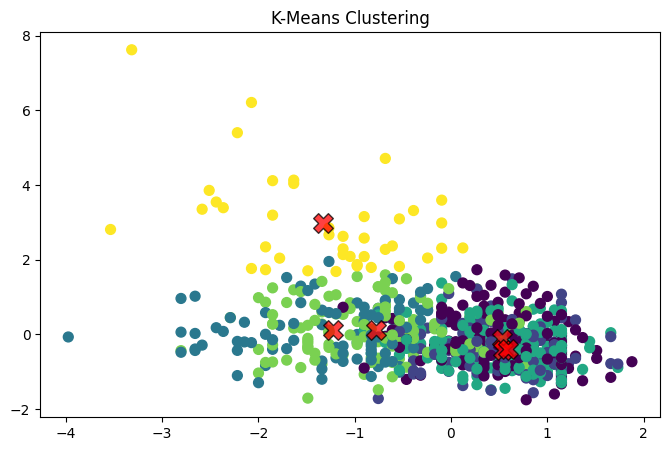

In [ ]:
## Apply KMeans clustering

# This function plots the KMeans cluster
def plot_clusters(X_scaled, y_kmeans):
  plt.figure(figsize=(8, 5))
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200,
  alpha=0.75, edgecolor='k', marker='X')
  plt.title('K-Means Clustering')
  plt.show()

## This scoring function prints KMeans metrics (Silhouette score, Davies-Bouldin score and Dunn Index)
def calculate_k_means_metrics(X_scaled, y_kmeans, to_print=True, to_plot=False):
  # Silhouette Score
  silhouette_avg = silhouette_score(X_scaled, y_kmeans)
  if to_print:
    print(f"Silhouette Score: {silhouette_avg}")

  # Davies-Bouldin Score
  db_score = davies_bouldin_score(X_scaled, y_kmeans)
  if to_print:
    print(f"Davies-Bouldin Score: {db_score}")

  # Dunn Index
  def dunn_index(X, labels):
      distances = squareform(pdist(X))
      unique_labels = np.unique(labels)
      delta = np.inf
      for i in range(len(unique_labels)):
          for j in range(i + 1, len(unique_labels)):
              delta = min(delta, np.min(distances[np.ix_(labels == unique_labels[i], labels == unique_labels[j])]))
      big_delta = np.max([np.max(distances[labels == k]) for k in unique_labels])
      return delta / big_delta

  dunn = dunn_index(X_scaled, y_kmeans)
  if to_print:
    print(f"Dunn Index: {dunn}")

  if to_plot:
    plot_clusters(X_scaled, y_kmeans)


# Cluster to 2,3,4,5, and 6 groups
for i in range(2,7):
  n_clusters = i
  print('### n_clusters = '+str(i)+' ###')
  # Fit the K-means model
  kmeans = KMeans(n_clusters, random_state=42)
  kmeans.fit(X_scaled)
  y_kmeans = kmeans.predict(X_scaled)

  calculate_k_means_metrics(X_scaled, y_kmeans, to_print=True, to_plot=True)


a Davies-Bouldin value>1 indicates a relatively **poor** clustering solution, suggesting:
* Clusters are not well-separated: The distance between clusters might be too small compared to the spread of points within each cluster.
* Clusters are not compact: Data points within a cluster might be too spread out.

We can see that indeed, for the chosen k values 2-6, the clusters are mostly overlapping, and are also spread out.

#Q3.a
Describe the steps involved in training a neural network, including forward propagation and backpropagation.

### Creating a neural network consists of two main characteristics:

1. Defining the Network Architecture:
* Number of layers, and number of neurons in each layer.
* Connection between the units (neurons), and the type of connection.
* Assigning activation and loss functions.

2. Defining the learining process:
* Assigning initial weights and biases.
* Forward propagation allows the network to make a prediction based on current weights and biases.
* Measuring how well the network's predictions match the actual data: The error can be calculated by using the loss function, which calculates the difference between the predicted and actual label values.
* Backpropagation is a method to compute the gradient of the loss function with respect to each parameter. It uses the computer error to fine-tune weights and biases, guiding the network towards better predictions in future iterations.
* Optimizers control the learning rate and are used to update weights and biases based on backpropagation gradients (common examples include SGD, Adam, RMSprop).
* Updating parameters using the optimizer.
* Repeat iteratively until convergence is reached.














# Q3.b
Explain the bias-variance trade-off in neural network performance. How does it affect model generalization?

### Bias-Variance Trade-off in DNN performance affects how well a model generalizes to unseen data.

Bias is defined as the error introduced by approximating a real-world problem with a simplified model. A high bias model is too simple and misses the underlying patterns in the training data, leading to consistently wrong predictions regardless of the data used (underfitting).

Variance is defined as the error introduced by the model's sensitivity to small fluctuations in the training data. A high variance model memorizes the training data too closely, including noise and irrelevant details. This leads to excellent performance on the training data but poor performance on unseen data (overfitting).

The Bias-Variance Trade-off:

* High bias leads to underfitting, where the model fails to capture the underlying patterns in the data.
* High variance leads to overfitting, where the model captures noise in the training data.


The goal is to find the right balance between bias and variance for optimal model performance. A model with low bias and low variance can learn the underlying patterns from the training data but also generalize well to unseen data, making accurate predictions.

# Q3.c
Highlight the importance of data preprocessing, normalization, and splitting for training effective deep learning models.

Proper data preprocessing, normalization, and splitting are **essential** for training **deep learning models**.

### Data preprocessing
Raw data often contains inconsistencies, missing values, and outliers that can negatively impact training.
Preprocessing techniques like handling missing values, encoding categorical variables, and scaling data ensures the data is consistent and usable for the model, thus improving the model's performance.

### Data normalization
Features with vastly different scales can lead to uneven weight updates during training, slowing down convergence or causing the model to prioritize features with larger scales.
Normalization techniques like min-max scaling or standardization bring all features to a similar range, promoting fairer treatment by the model and potentially improving convergence and accuracy.

### Splitting the data into training, validation, and testing sets:
* The training set is used to train model (70-80% of total dataset)
* The validation set helps fine-tune hyperparameters to avoid overfitting and evaluate the architecture of the model (10-15% of the total dataset)
* The testing set is used for final evaluation of the model, providing an unbiased evaluation of the model's generalizability to unseen data (10-15% of the total dataset)

Without proper splitting, a DNN can easily overfit to the training data and perform poorly on real-world scenarios.

# Q3.d+e

Train a DNN that classify the outcome based on the age and the blood sodium only. For that you need to import several functions from tensorflow.keras ,ans sklearn, as described in this block:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1.
Separate 'age' and 'blood sodium' as features (X) and 'outcome' as the label (y), ensure the data is clean by removing any rows with missing values using dropna(), and use StandardScaler from sklearn.preprocessing to standardize the features, ensuring that our model receives data within a normalized scale..

In [ ]:
X = data[['age', 'Blood sodium', 'outcome']]

# Data cleaning - Drop rows with missing values
X = X.dropna()

y = X['outcome']
X = X.drop('outcome', axis=1)

# Data normalization - Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X.isna().sum()

age             0
Blood sodium    0
dtype: int64

In [ ]:
y[y.isna()]

Series([], Name: outcome, dtype: float64)

2. Split the data into 4 sets: X_train, X_test, y_train, y_test. Use train_test_split() where train size is 80%. Keep the random state as 42.

In [ ]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

3. Construct a deep neural network using four dense layers. Configure the first three layers to each include 3 neurons and utilize the ReLU activation function. The final layer should contain a single neuron with a Sigmoid activation function, suitable for our binary classification tasks. Enhance the model's ability to generalize by incorporating two dropout layers with a dropout rate of 0.05, positioned between every two dense layers to reduce overfitting.

In [ ]:

'''
# Convert to TensorFlow datasets
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)
'''

# Create a simple neural network model

model = Sequential()
# Adding layers with different activation functions
model.add(Dense(units=3, activation='relu', input_shape=(X_train.shape[1],))) # input layer
model.add(Dense(units=3, activation='relu')) # hidden layer 1
model.add(Dropout(0.05))
model.add(Dense(units=3, activation='relu')) # hidden layer 2
model.add(Dense(units=3, activation='relu')) # hidden layer 3
model.add(Dropout(0.05))
model.add(Dense(units=1, activation='sigmoid')) # output layer


Compile the neural network specifying binary_crossentropy as the loss function, adam as the optimizer, and accuracy as the performance metric. Train the model using a 20% validation split for 100 epochs to monitor and validate learning progress over time. Afterwards, graph both the training and validation accuracy, as well as the loss per epoch, to visually assess model performance and convergence. Use the provided examples as a guide for plotting.

Epoch 1/100
30/30 [==============================] - 4s 11ms/step - loss: 0.7048 - accuracy: 0.5957 - val_loss: 0.6933 - val_accuracy: 0.6737
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6850 - accuracy: 0.7681 - val_loss: 0.6785 - val_accuracy: 0.7712
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6704 - accuracy: 0.8383 - val_loss: 0.6675 - val_accuracy: 0.8051
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6588 - accuracy: 0.8596 - val_loss: 0.6575 - val_accuracy: 0.8305
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 0.6480 - accuracy: 0.8681 - val_loss: 0.6488 - val_accuracy: 0.8305
Epoch 6/100
30/30 [==============================] - 0s 9ms/step - loss: 0.6382 - accuracy: 0.8723 - val_loss: 0.6405 - val_accuracy: 0.8305
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 0.6288 - accuracy: 0.8723 - val_loss: 0.6324 - val_accuracy: 0.8305
Epoch 8/100


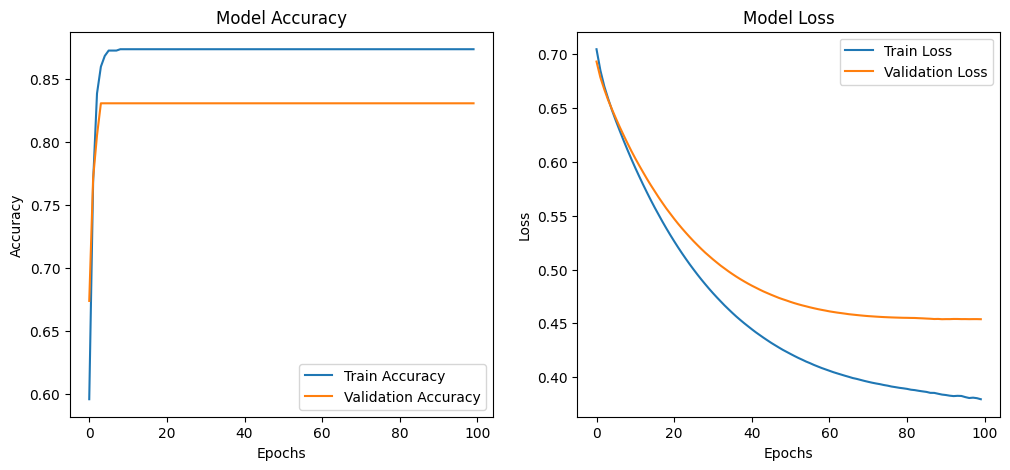

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100)

# Visualize training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


5. Evaluate and Visualize Model Performance: Assess the model's accuracy on the test set to gauge its effectiveness in real-world scenarios. Next, visualize the results by plotting a confusion matrix. Additionally, display the model's architecture by invoking model.summary(), which provides a detailed overview of the model layers, their shapes, and the number of parameters involved.

8/8 [==============================] - 0s 2ms/step


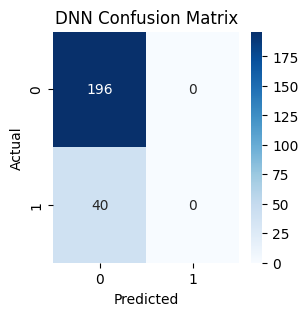

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 4

In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Apply threshold to convert predictions to 0 or 1, as we have a classification problem
y_pred = [0 if pred < 0.5 else 1 for pred in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot confusion matrix
Plot_confusion_matrix(y_test, y_pred,'DNN')

# Print the model summary
model.summary()

6. Design a deep neural network model tailored to our predication task of in-hospital mortality. Select relevant features. Your model should include a combination of dense layers and activation functions optimized for binary classification. Try to play with the optimizer, loss, etc.

Data shape:  (428, 49)
Epoch 1/50
11/11 [==============================] - 3s 33ms/step - loss: 0.5861 - accuracy: 0.8509 - val_loss: 0.5608 - val_accuracy: 0.8372
Epoch 2/50
11/11 [==============================] - 0s 11ms/step - loss: 0.5387 - accuracy: 0.8509 - val_loss: 0.5197 - val_accuracy: 0.8372
Epoch 3/50
11/11 [==============================] - 0s 12ms/step - loss: 0.4971 - accuracy: 0.8509 - val_loss: 0.4931 - val_accuracy: 0.8372
Epoch 4/50
11/11 [==============================] - 0s 11ms/step - loss: 0.4784 - accuracy: 0.8509 - val_loss: 0.4778 - val_accuracy: 0.8372
Epoch 5/50
11/11 [==============================] - 0s 11ms/step - loss: 0.4649 - accuracy: 0.8509 - val_loss: 0.4690 - val_accuracy: 0.8372
Epoch 6/50
11/11 [==============================] - 0s 10ms/step - loss: 0.4524 - accuracy: 0.8509 - val_loss: 0.4626 - val_accuracy: 0.8372
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 0.4490 - accuracy: 0.8509 - val_loss: 0.4580 - val_accurac

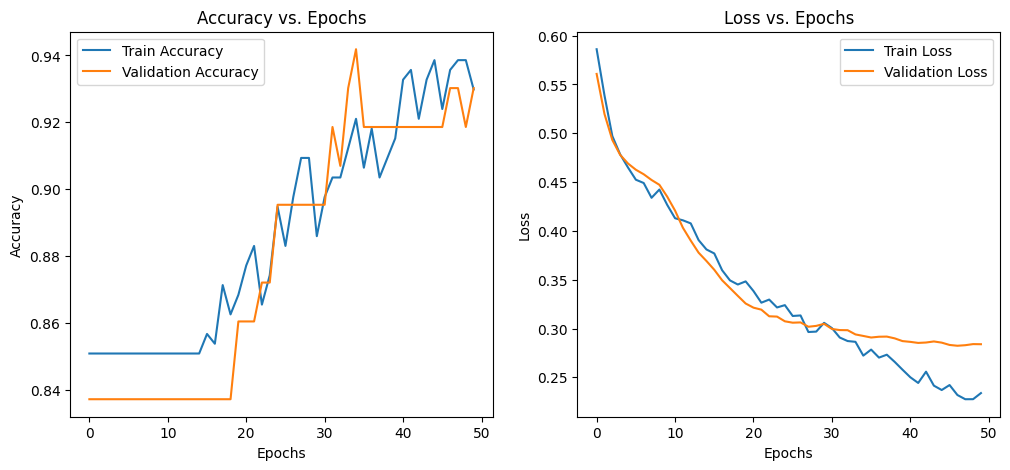

3/3 [==============================] - 0s 3ms/step


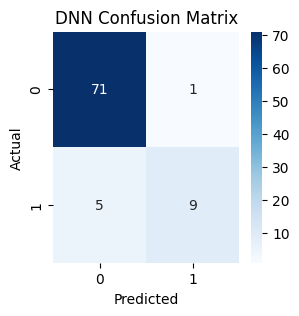

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 49)                2450      
                                                                 
 dense_6 (Dense)             (None, 13)                650       
                                                                 
 dropout_2 (Dropout)         (None, 13)                0         
                                                                 
 dense_7 (Dense)             (None, 13)                182       
                                                                 
 dropout_3 (Dropout)         (None, 13)                0         
                                                                 
 dense_8 (Dense)             (None, 9)                 126       
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
from tensorflow.keras.regularizers import l2

# General model based on the entire dataset
X = data

# Data cleaning - Drop rows with missing values
X = X.dropna()
#'outcome' will be used as the label
y = X['outcome']
# Remove 'ID' column completely - it will not predict mortality.
X = X.drop(['outcome','ID'], axis=1)

print('Data shape: ', X.shape)

# Data normalization - Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a simple neural network model
model = Sequential()
# Adding layers with different activation functions
model.add(Dense(X_train.shape[1], activation='sigmoid', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(13, activation='relu', kernel_regularizer=l2(0.001)))  # Hidden layer 1
model.add(Dropout(0.3))  # Dropout layer with 20% dropout rate
model.add(Dense(13, activation='tanh', kernel_regularizer=l2(0.001)))  # Hidden layer 2
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(Dense(9, activation='sigmoid'))  # Hidden layer 3
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=50)

# Visualize training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.show()

# Evaluate the model
model.evaluate(X_test, y_test)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Apply threshold to convert predictions to 0 or 1, as we have a classification problem
y_pred = [0 if pred < 0.5 else 1 for pred in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot confusion matrix
Plot_confusion_matrix(y_test, y_pred,'DNN')

# Print the model summary
model.summary()

In [ ]:
'''
# Initializing model parameters

for layer in model.layers:
  # Check for layer types with weights (e.g., Dense)
  if hasattr(layer, 'kernel_initializer'):
    # Get the weights
    weights = layer.get_weights()
    # Re-initialize kernel (weights) using the existing initializer
    new_weights = layer.kernel_initializer(weights[0].shape)
    layer.set_weights([new_weights] + weights[1:]) # Set the new weights, keeping the biases
'''

"\n# Initializing model parameters\n\nfor layer in model.layers:\n  # Check for layer types with weights (e.g., Dense)\n  if hasattr(layer, 'kernel_initializer'):\n    # Get the weights\n    weights = layer.get_weights()\n    # Re-initialize kernel (weights) using the existing initializer\n    new_weights = layer.kernel_initializer(weights[0].shape)\n    layer.set_weights([new_weights] + weights[1:]) # Set the new weights, keeping the biases\n"